## Anggota Kelompok

- Akhmadheta Hafid P.
- Fauzan Pradana
- Taufik Anwar

# Sentimen Analisis pada Aplikasi Cek Bansos Berdasarkan Ulasan Pengguna

### Additional Package

In [1]:
!pip install Sastrawi

     -------------------------------------- 209.7/209.7 kB 1.8 MB/s eta 0:00:00


In [2]:
!pip install swifter

     -------------------------------------- 830.9/830.9 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16300 sha256=1d88b3fbd286ecd8094b6a3efe891618e71a2bc8520c7bbf0c45c5a658116dd7
  Stored in directory: c:\users\nitro5_hafid\appdata\local\pip\cache\wheels\08\66\b4\921e351e63d88696932279d6163e125727c9da70ed8ca38419
Successfully built swifter


In [3]:
!pip install wordcloud

     -------------------------------------- 152.9/152.9 kB 1.8 MB/s eta 0:00:00


#### Import Library

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

#### Pengambilan Data

#### Read Dataset

In [5]:
ulasan = pd.read_csv('dataset/dataset.csv', index_col=0)

In [6]:
ulasan

,label,content
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b..."
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta..."
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ..."
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...
4,Negative,"Tidak bisa login, padahal email dan password s..."
...,...,...
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...
1997,Negative,"Tolong dong, ini aplikasinya sedang error"
1998,Negative,Error mulu setiap mau login... 👎


#### EDA

In [7]:
ulasan.isnull().count()

label      2000
content    2000
dtype: int64

#### CASEFOLDING

In [8]:
import re
def cleaningulasan(ulasan):
  ulasan = re.sub(r'@[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r'#[A-Za-z0-9]+',' ',ulasan)
  ulasan = re.sub(r"http\S+",' ',ulasan)
  ulasan = re.sub(r'[0-9]+',' ',ulasan)
  ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
  ulasan = ulasan.strip(' ')
  return ulasan
ulasan['cleaning']= ulasan['content'].apply(cleaningulasan)

def clearEmoji(ulasan):
    return ulasan.encode('ascii', 'ignore').decode('ascii')
ulasan['hapusEmoji']= ulasan['cleaning'].apply(clearEmoji)

def replaceTOM(ulasan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', ulasan)
ulasan['replaceTOM']= ulasan['hapusEmoji'].apply(replaceTOM)

def casefoldingText(ulasan):
  ulasan = ulasan.lower()
  return ulasan
ulasan['caseFolding']= ulasan['replaceTOM'].apply(casefoldingText)

ulasan

,label,content,cleaning,hapusEmoji,replaceTOM,caseFolding
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b...",Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,tidak pernah sempurna dulu sulit login pas b...
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta...",Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,eror terus ketika pengajuan usulan sinyal sta...
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ...",Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,buruk banget aplikasi ini emangnya tidak ada ...
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,sudah updated versi terakhir tapi tetap tidak ...
4,Negative,"Tidak bisa login, padahal email dan password s...",Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,tidak bisa login padahal email dan password s...
...,...,...,...,...,...,...
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,admin tolong diperbaiki kenapa kalo mau menamb...
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,apikasi nya eror terus tolong di pebaiki agar ...
1997,Negative,"Tolong dong, ini aplikasinya sedang error",Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,tolong dong ini aplikasinya sedang error
1998,Negative,Error mulu setiap mau login... 👎,Error mulu setiap mau login 👎,Error mulu setiap mau login,Error mulu setiap mau login,error mulu setiap mau login


#### TOKENIZING

In [9]:
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenizingText(ulasan):
  ulasan = word_tokenize(ulasan)
  return ulasan

ulasan['tokenizing']= ulasan['caseFolding'].apply(tokenizingText)

ulasan

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nitro5_Hafid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,label,content,cleaning,hapusEmoji,replaceTOM,caseFolding,tokenizing
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b...",Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,tidak pernah sempurna dulu sulit login pas b...,"[tidak, pernah, sempurna, dulu, sulit, login, ..."
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta...",Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,eror terus ketika pengajuan usulan sinyal sta...,"[eror, terus, ketika, pengajuan, usulan, sinya..."
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ...",Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,buruk banget aplikasi ini emangnya tidak ada ...,"[buruk, banget, aplikasi, ini, emangnya, tidak..."
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,sudah updated versi terakhir tapi tetap tidak ...,"[sudah, updated, versi, terakhir, tapi, tetap,..."
4,Negative,"Tidak bisa login, padahal email dan password s...",Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,tidak bisa login padahal email dan password s...,"[tidak, bisa, login, padahal, email, dan, pass..."
...,...,...,...,...,...,...,...
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,admin tolong diperbaiki kenapa kalo mau menamb...,"[admin, tolong, diperbaiki, kenapa, kalo, mau,..."
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,apikasi nya eror terus tolong di pebaiki agar ...,"[apikasi, nya, eror, terus, tolong, di, pebaik..."
1997,Negative,"Tolong dong, ini aplikasinya sedang error",Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,tolong dong ini aplikasinya sedang error,"[tolong, dong, ini, aplikasinya, sedang, error]"
1998,Negative,Error mulu setiap mau login... 👎,Error mulu setiap mau login 👎,Error mulu setiap mau login,Error mulu setiap mau login,error mulu setiap mau login,"[error, mulu, setiap, mau, login]"


#### FORMALISASI

In [10]:
def convertToSlangword(ulasan):
    kamusSlang = eval(open("dataset/slangwords.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in ulasan:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()],kata)
        content.append(filterSlang.lower())
    ulasan = content
    return ulasan

ulasan['formalisasi'] = ulasan['tokenizing'].apply(convertToSlangword)

In [11]:
ulasan

,label,content,cleaning,hapusEmoji,replaceTOM,caseFolding,tokenizing,formalisasi
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b...",Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,tidak pernah sempurna dulu sulit login pas b...,"[tidak, pernah, sempurna, dulu, sulit, login, ...","[tidak, pernah, sempurna, dulu, sulit, login, ..."
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta...",Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,eror terus ketika pengajuan usulan sinyal sta...,"[eror, terus, ketika, pengajuan, usulan, sinya...","[error, terus, ketika, pengajuan, usulan, siny..."
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ...",Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,buruk banget aplikasi ini emangnya tidak ada ...,"[buruk, banget, aplikasi, ini, emangnya, tidak...","[buruk, banget, aplikasi, ini, memangnya, tida..."
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,sudah updated versi terakhir tapi tetap tidak ...,"[sudah, updated, versi, terakhir, tapi, tetap,...","[sudah, updated, versi, terakhir, tapi, tetap,..."
4,Negative,"Tidak bisa login, padahal email dan password s...",Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,tidak bisa login padahal email dan password s...,"[tidak, bisa, login, padahal, email, dan, pass...","[tidak, bisa, login, padahal, email, dan, pass..."
...,...,...,...,...,...,...,...,...
1995,Negative,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,Admin tolong diperbaiki kenapa kalo mau menamb...,admin tolong diperbaiki kenapa kalo mau menamb...,"[admin, tolong, diperbaiki, kenapa, kalo, mau,...","[admin, tolong, diperbaiki, kenapa, kalau, mau..."
1996,Negative,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,Apikasi nya eror terus tolong di pebaiki Agar ...,apikasi nya eror terus tolong di pebaiki agar ...,"[apikasi, nya, eror, terus, tolong, di, pebaik...","[apikasi, nya, error, terus, tolong, di, pebai..."
1997,Negative,"Tolong dong, ini aplikasinya sedang error",Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,Tolong dong ini aplikasinya sedang error,tolong dong ini aplikasinya sedang error,"[tolong, dong, ini, aplikasinya, sedang, error]","[tolong, dong, ini, aplikasinya, sedang, error]"
1998,Negative,Error mulu setiap mau login... 👎,Error mulu setiap mau login 👎,Error mulu setiap mau login,Error mulu setiap mau login,error mulu setiap mau login,"[error, mulu, setiap, mau, login]","[error, melulu, setiap, mau, login]"


#### Stopword

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

daftar_stopword = stopwords.words('indonesian')
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
daftar_stopword.extend(["yg","dg","rt"])
daftar_stopword = set(daftar_stopword)

def stopwordText(words):
  print(words)
  return [word for word in words if word not in daftar_stopword]

ulasan['stopwordRemoval'] = ulasan['formalisasi'].apply(stopwordText)

# ulasan

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitro5_Hafid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['tidak', 'pernah', 'sempurna', 'dulu', 'sulit', 'login', 'pas', 'bisa', 'jadi', 'sulit', 'beri', 'tanggapan', 'nanti', 'apalagi', 'dan', 'muternya', 'lama', 'alias', 'lambat berfikir', 'berasa', 'berat', 'kurang', 'membantu', 'padahal', 'harapan', 'masyarakat', 'supaya', 'terbantu', 'buat', 'aplikasi', 'kan', 'tidak', 'murah', 'tapi', 'kok', 'begini', 'iya']
['error', 'terus', 'ketika', 'pengajuan', 'usulan', 'sinyal', 'stabil', 'tapi', 'tetap', 'error', 'ga', 'jelas', 'tolong', 'di', 'perbaiki', 'di', 'aplikasi', 'ada', 'keterang', 'error', 'hubungi', 'admin', 'tapi', 'di', 'dalam', 'aplikasi', 'tidak', 'ada', 'pengaturan', 'untuk', 'menghubungi', 'admin', 'tolong', 'di', 'teliti', 'lagi', 'dalam', 'membuat', 'sebuah', 'aplikasi', 'terima kasih']
['buruk', 'banget', 'aplikasi', 'ini', 'memangnya', 'tidak', 'ada', 'apa', 'yang', 'mengatasi', 'masalah', 'aplikasinya', 'sekelas', 'kemensos', 'masak', 'punya', 'sistem', 'begini', 'parah', 'sangat', 'lama', 'saya', 'tunggu', 'verifikasiny

#### STEMMING

In [13]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in ulasan['stopwordRemoval']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
def stemmingText(document):
    return [term_dict[term] for term in document]

ulasan['stemming'] = ulasan['stopwordRemoval'].swifter.apply(stemmingText)

sempurna : sempurna
sulit : sulit
login : login
pas : pas
tanggapan : tanggap
muternya : muternya
alias : alias
lambat berfikir : lambat berfikir
berasa : asa
berat : berat
membantu : bantu
harapan : harap
masyarakat : masyarakat
terbantu : bantu
aplikasi : aplikasi
murah : murah
iya : iya
error : error
pengajuan : aju
usulan : usul
sinyal : sinyal
stabil : stabil
ga : ga
tolong : tolong
perbaiki : baik
keterang : terang
hubungi : hubung
admin : admin
pengaturan : atur
menghubungi : hubung
teliti : teliti
terima kasih : terima kasih
buruk : buruk
banget : banget
memangnya : memang
mengatasi : atas
aplikasinya : aplikasi
sekelas : kelas
kemensos : kemensos
masak : masak
sistem : sistem
parah : parah
tunggu : tunggu
verifikasinya : verifikasi
dikirim : kirim
email : email
pengurusan : urus
desa : desa
prosesnya : proses
pengiriman : kirim
pesan : pesan
otomatis : otomatis
jam : jam
jedanya : jeda
hadeh : hadeh
updated : updated
versi : versi
dibuka : buka
tinggal : tinggal
verifikasi : v

Pandas Apply:   0%|          | 0/2000 [00:00<?, ?it/s]

In [14]:
ulasan['stemming']

0       [sempurna, sulit, login, pas, sulit, tanggap, ...
1       [error, aju, usul, sinyal, stabil, error, ga, ...
2       [buruk, banget, aplikasi, memang, atas, aplika...
3       [updated, versi, buka, aplikasi, tinggal, veri...
4       [login, email, password, sdh, sdh, email, akun...
                              ...                        
1995           [admin, tolong, baik, tambah, usul, error]
1996    [apikasi, nya, error, tolong, baik, kmi, cek, ...
1997                            [tolong, aplikasi, error]
1998                               [error, melulu, login]
1999    [dana, perintah, triliun, rupiah, aplikasi, ja...
Name: stemming, Length: 2000, dtype: object

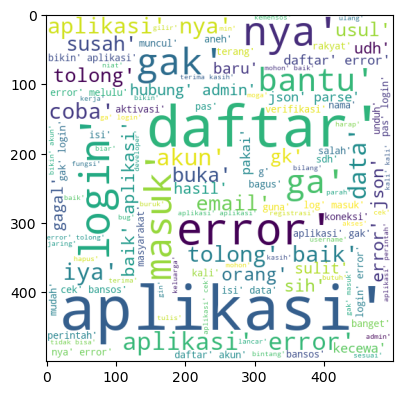

In [15]:
stemm_list = ulasan['stemming'].tolist()
stemm_ls = []
for w in stemm_list:
  stemm_ls += w

from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
#content
stemming=wc.generate(str(stemm_ls))
plt.figure(figsize=(4.5,4.5))
plt.imshow(stemming)

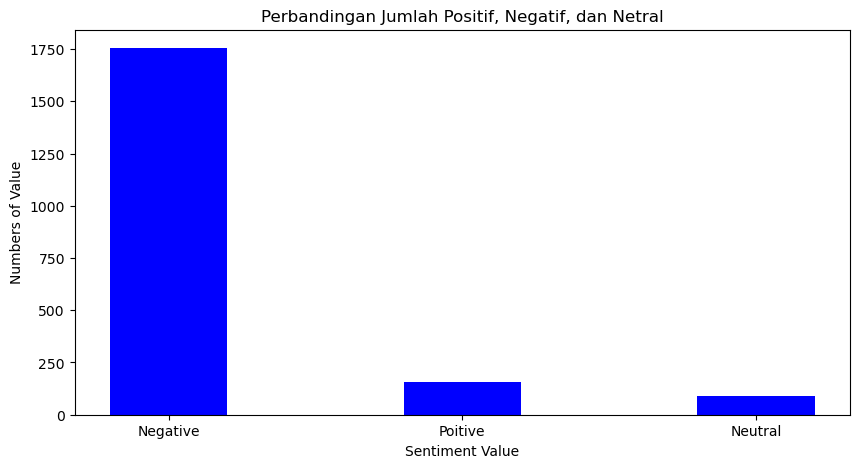

In [16]:
negative_label = (ulasan[ulasan['label'] == 'Negative']['label']).count()
positive_label = (ulasan[ulasan['label'] == 'Positive']['label']).count()
neutral_label = (ulasan[ulasan['label'] == 'Neutral']['label']).count()

# set(ulasan['label'])

label = ['Negative', 'Poitive', 'Neutral']
values = [negative_label, positive_label, neutral_label]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(label, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Sentiment Value")
plt.ylabel("Numbers of Value")
plt.title("Perbandingan Jumlah Positif, Negatif, dan Netral")
plt.show()

In [17]:
ulasan['stemming']

0       [sempurna, sulit, login, pas, sulit, tanggap, ...
1       [error, aju, usul, sinyal, stabil, error, ga, ...
2       [buruk, banget, aplikasi, memang, atas, aplika...
3       [updated, versi, buka, aplikasi, tinggal, veri...
4       [login, email, password, sdh, sdh, email, akun...
                              ...                        
1995           [admin, tolong, baik, tambah, usul, error]
1996    [apikasi, nya, error, tolong, baik, kmi, cek, ...
1997                            [tolong, aplikasi, error]
1998                               [error, melulu, login]
1999    [dana, perintah, triliun, rupiah, aplikasi, ja...
Name: stemming, Length: 2000, dtype: object

In [18]:
ulasan['label']

0       Negative
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
1995    Negative
1996    Negative
1997    Negative
1998    Negative
1999    Negative
Name: label, Length: 2000, dtype: object

In [19]:
ulasan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   label            2000 non-null   object
 1   content          2000 non-null   object
 2   cleaning         2000 non-null   object
 3   hapusEmoji       2000 non-null   object
 4   replaceTOM       2000 non-null   object
 5   caseFolding      2000 non-null   object
 6   tokenizing       2000 non-null   object
 7   formalisasi      2000 non-null   object
 8   stopwordRemoval  2000 non-null   object
 9   stemming         2000 non-null   object
dtypes: object(10)
memory usage: 236.4+ KB


In [20]:
ulasan.head()

,label,content,cleaning,hapusEmoji,replaceTOM,caseFolding,tokenizing,formalisasi,stopwordRemoval,stemming
0,Negative,"Tidak pernah sempurna. Dulu sulit login, pas b...",Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,Tidak pernah sempurna Dulu sulit login pas b...,tidak pernah sempurna dulu sulit login pas b...,"[tidak, pernah, sempurna, dulu, sulit, login, ...","[tidak, pernah, sempurna, dulu, sulit, login, ...","[sempurna, sulit, login, pas, sulit, tanggapan...","[sempurna, sulit, login, pas, sulit, tanggap, ..."
1,Negative,"Eror terus ketika pengajuan usulan, sinyal sta...",Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,Eror terus ketika pengajuan usulan sinyal sta...,eror terus ketika pengajuan usulan sinyal sta...,"[eror, terus, ketika, pengajuan, usulan, sinya...","[error, terus, ketika, pengajuan, usulan, siny...","[error, pengajuan, usulan, sinyal, stabil, err...","[error, aju, usul, sinyal, stabil, error, ga, ..."
2,Negative,"Buruk banget aplikasi ini, emangnya tidak ada ...",Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,Buruk banget aplikasi ini emangnya tidak ada ...,buruk banget aplikasi ini emangnya tidak ada ...,"[buruk, banget, aplikasi, ini, emangnya, tidak...","[buruk, banget, aplikasi, ini, memangnya, tida...","[buruk, banget, aplikasi, memangnya, mengatasi...","[buruk, banget, aplikasi, memang, atas, aplika..."
3,Negative,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,Sudah Updated versi Terakhir tapi Tetap Tidak ...,sudah updated versi terakhir tapi tetap tidak ...,"[sudah, updated, versi, terakhir, tapi, tetap,...","[sudah, updated, versi, terakhir, tapi, tetap,...","[updated, versi, dibuka, aplikasinya, tinggal,...","[updated, versi, buka, aplikasi, tinggal, veri..."
4,Negative,"Tidak bisa login, padahal email dan password s...",Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,Tidak bisa login padahal email dan password s...,tidak bisa login padahal email dan password s...,"[tidak, bisa, login, padahal, email, dan, pass...","[tidak, bisa, login, padahal, email, dan, pass...","[login, email, password, sdh, sdh, email, akun...","[login, email, password, sdh, sdh, email, akun..."


#### TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = ulasan['stemming']
Y = ulasan['label']

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=64)

def dummy_fun(doc):
    return doc

vectorizer = TfidfVectorizer(analyzer='word',
    tokenizer=dummy_fun,
    preprocessor=dummy_fun,
    token_pattern=None)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

['rekam', 'data', 'mohon', 'bantu', 'biar', 'aplikasi', 'cepat']
ASEM
  (0, 1062)	0.6205429174618894
  (0, 523)	0.5635859145534963
  (0, 1)	0.5452498551167032
  (1, 1814)	0.45912361330846063
  (1, 1)	0.8883723924698376
  (2, 1062)	1.0
  (3, 1814)	0.7187014651906984
  (3, 1)	0.6953187786423888
  (4, 709)	0.7187014651906984
  (4, 1)	0.6953187786423888
  (5, 1597)	0.3282107851378952
  (5, 1359)	0.31058874525803826
  (5, 969)	0.3282107851378952
  (5, 709)	0.5961714179732683
  (5, 1)	0.5767752012258439
  (6, 1814)	0.49865312158452857
  (6, 1359)	0.5195688444053761
  (6, 523)	0.49865312158452857
  (6, 1)	0.48242962656875954


### SVM

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

SVM = svm.SVC(kernel='rbf', probability=True)    #Jika dengan Kernel RBF
# SVM = svm.SVC(kernel='linear') #Jika dengan Kernel Linear
SVM.fit(x_train,y_train)

y_pred_svm = SVM.predict(x_test)

acc_score = cross_val_score(SVM, x_train, y_train, cv=15, scoring='accuracy')

print('Hasil Rata - Rata Accuracy : %s' % acc_score.mean())

Hasil Rata - Rata Accuracy : 0.8864409364752533


### Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(x_train, y_train)

y_pred_nb = mnb.predict(x_test)

# Evaluasi akurasi data training
acc_score_nb = cross_val_score(mnb, x_train, y_train, cv=15, scoring='accuracy')
# acc_test = accuracy_score(y_test, y_pred_nb)

# Print hasil evaluasi
print(f'Hasil akurasi data test: {acc_score_nb.mean()}')

Hasil akurasi data test: 0.8842903988408447


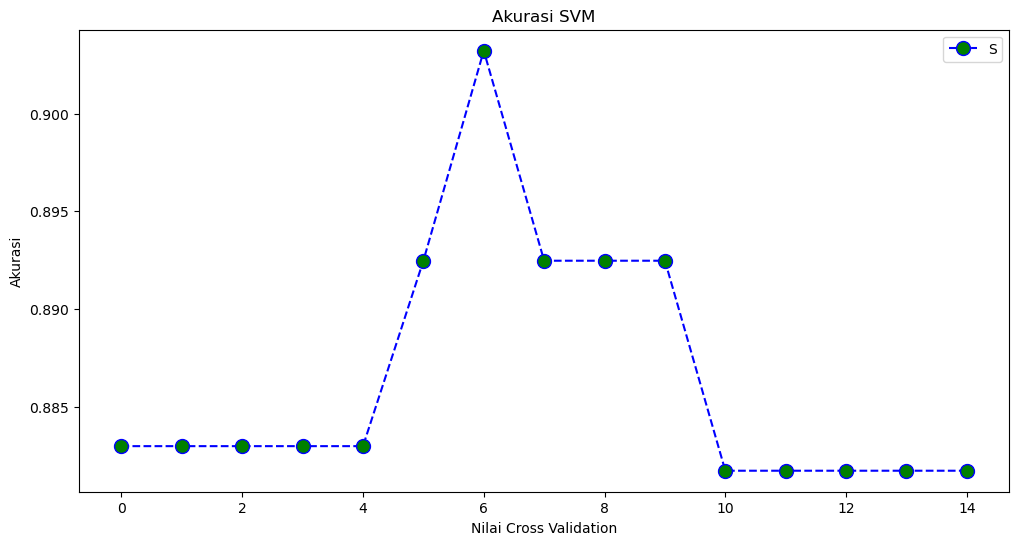

In [24]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, 15), acc_score, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Akurasi SVM')  
plt.xlabel('Nilai Cross Validation')  
plt.ylabel('Akurasi')
# plt.ylim(ymin=0, ymax=1)
plt.legend('SVM')

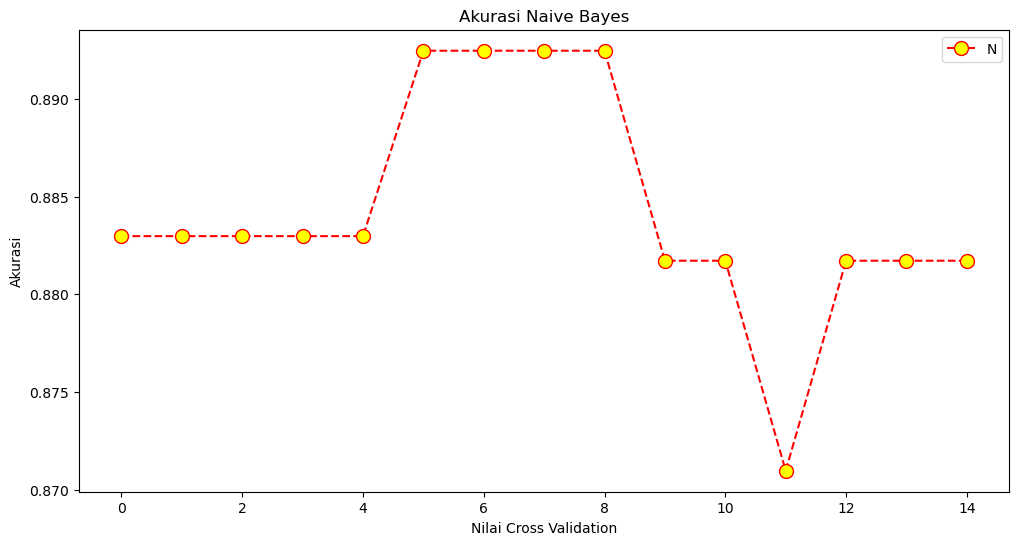

In [25]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, 15), acc_score_nb, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.title('Akurasi Naive Bayes')  
plt.xlabel('Nilai Cross Validation')  
plt.ylabel('Akurasi')
# plt.ylim(ymin=0, ymax=1)
plt.legend('Naive Bayes')

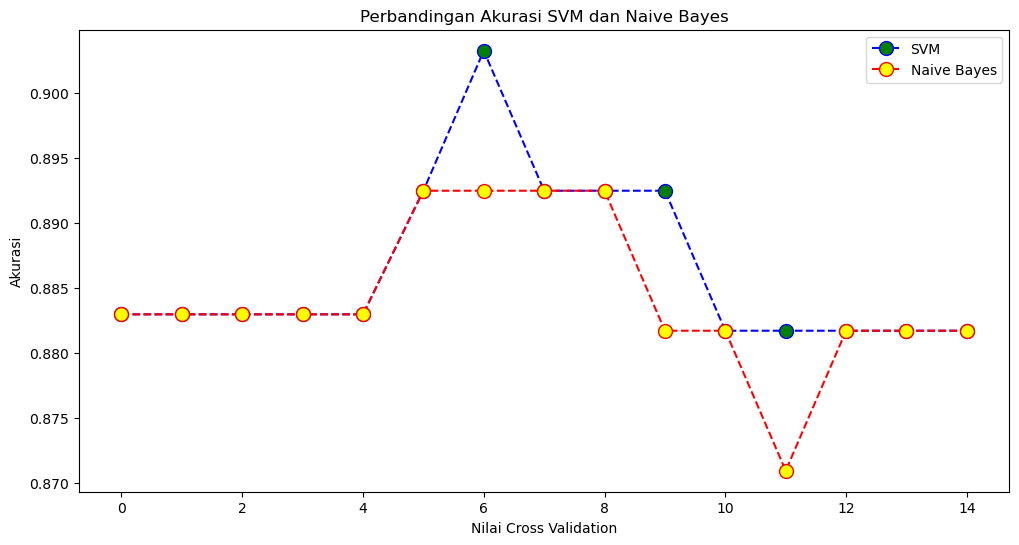

In [26]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, 15), acc_score, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.plot(range(0, 15), acc_score_nb, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='yellow', markersize=10)
plt.title('Perbandingan Akurasi SVM dan Naive Bayes')  
plt.xlabel('Nilai Cross Validation')  
plt.ylabel('Akurasi')
# plt.ylim(ymin=0, ymax=1)
plt.legend(['SVM', 'Naive Bayes'])

#### Confusion Matrix (Perbandingan)

In [27]:
# Membuat Confusion Matrix dan ROC AUC dari KNN dan Random Forest
from sklearn.metrics import classification_report

print('SVM')
print(classification_report(y_test, y_pred_svm))
print('Naive Bayes')
print(classification_report(y_test, y_pred_nb))

SVM
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       516
           1       0.00      0.00      0.00        36
           2       1.00      0.02      0.04        48

    accuracy                           0.86       600
   macro avg       0.62      0.34      0.32       600
weighted avg       0.82      0.86      0.80       600

Naive Bayes
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       516
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        48

    accuracy                           0.86       600
   macro avg       0.29      0.33      0.31       600
weighted avg       0.74      0.86      0.80       600



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr